In [102]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [123]:
properatti_df_bsas=pd.read_csv("./tp2_properati.csv", sep=",", encoding='utf-8')
properatti_df_bsas = properatti_df_bsas.drop_duplicates()
properatti_df_bsas.sample(5)


,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
28747,111194,Once,1875.000000,200.0,5.0,375000.0,375000.0,False,True,False,False,False,False,False,False,False,False,False
8353,32850,Caballito,NaN,551.0,4.0,295000.0,295000.0,False,True,False,False,False,False,False,False,False,False,False
28766,111309,Centro / Microcentro,NaN,28.0,1.0,69000.0,69000.0,False,True,False,False,False,False,False,False,False,False,False
15454,59328,Villa Urquiza,1818.181818,55.0,2.0,100000.0,100000.0,False,False,False,False,False,False,False,False,False,False,False
27545,106360,NaN,1771.929825,57.0,2.0,101000.0,101000.0,True,True,True,False,True,True,True,True,False,False,False


In [126]:
properatti_df_bsas.dropna(inplace=True)

In [105]:
lista_columnas_df = properatti_df_bsas.columns.tolist()
lista=lista_columnas_df
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [127]:
properatti_df_bsas=properatti_df_bsas.drop(['Unnamed: 0'], axis=1)

In [128]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
20565,Belgrano,2547.222222,72.0,3.0,183400.000000,183400.00,0,0,0,0,0,0,0,0,0,0,0
27625,Villa del Parque,2444.444444,27.0,1.0,66000.000000,66000.00,0,0,0,0,0,0,0,0,0,0,0
7874,Once,2068.965517,29.0,1.0,60000.000000,60000.00,0,0,0,0,0,0,0,0,0,0,0
27214,Villa Urquiza,2368.571429,35.0,3.0,82900.000000,82900.00,1,0,0,0,1,0,1,1,0,0,0
4394,Flores,2235.869216,51.0,2.0,115231.375707,114029.33,1,1,1,0,1,0,1,0,0,0,1


In [129]:
properatti_df_bsas.shape

(22280, 17)

In [130]:
properatti_df_bsas.isnull().mean().sort_values(ascending=False) * 100

barrio                     0.0
pileta                     0.0
baulera                    0.0
quincho                    0.0
solarium                   0.0
lavadero                   0.0
gimnasio                   0.0
parrilla                   0.0
sum                        0.0
price_usd_per_m2           0.0
estacionamiento            0.0
amenities                  0.0
precios_aprox_usd_clean    0.0
precios_nuevos             0.0
rooms_clean                0.0
surface_total_clean        0.0
terraza                    0.0
dtype: float64

In [132]:
properatti_df_bsas = properatti_df_bsas.round(2)
properatti_df_bsas.sample(4)

,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
12775,Villa Urquiza,2635.45,110.0,4.0,289900.00,289900.00,1,0,0,0,0,0,1,0,0,0,0
10756,Floresta,927.15,151.0,3.0,140000.00,140000.00,1,0,0,0,0,0,0,0,0,0,1
24893,Belgrano,4134.97,162.0,4.0,676925.96,669864.55,1,0,1,1,1,1,1,1,0,0,1
7416,Barrio Norte,3000.00,65.0,3.0,195000.00,195000.00,0,0,0,0,0,0,0,0,0,0,0


In [143]:
correlation1 = properatti_df_bsas.select_dtypes('number').corr()
correlation1 = correlation1.abs()
#correlation1 = correlation1[(correlation1 != 1)]
low_corr_columns = correlation1[(correlation1 < 0.2) | (correlation1 == 1)]
mascara = np.triu(np.ones_like(low_corr_columns, dtype=bool))
#print(low_corr_columns)

<Axes: >

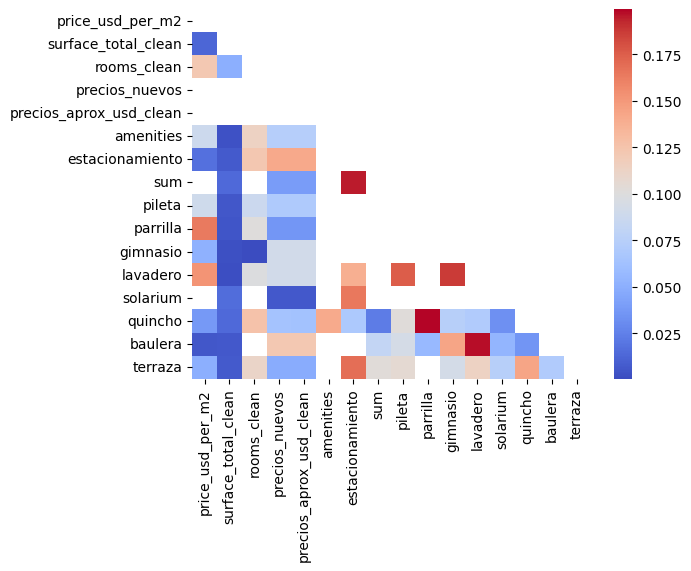

In [144]:
# Crea el heatmap
sns.heatmap(low_corr_columns, mask=mascara,fmt=".2f", cmap='coolwarm')

In [ ]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [ ]:
#Regresión lineal múltiple simple
feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
X=properatti_no_nulos[feature_cols]
y=properatti_no_nulos.price_usd_per_m2
linreg=LinearRegression()
linreg.fit(X,y)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X,y))



[-1.74512350e-01 -5.46018657e+02  3.56065257e-03]
3497.95703149799
0.12845989834322602


In [ ]:
list(zip(feature_cols, linreg.coef_))

[('surface_total_clean', -0.1745123502416242),
 ('rooms_clean', -546.0186572360976),
 ('precios_nuevos', 0.0035606525741513906)]

In [ ]:
#Separamos el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [ ]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1297.6565024541292
MSE: 16862148.32072441
RMSE: 4106.354626761357
R2: 0.15325013699653833



In [ ]:
#Que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1429.3662267136551
MSE: 21019743.478098154
RMSE: 4584.729378938102
R2: -0.2291195620317943



In [ ]:
#Se observa que el no hay correlación


In [ ]:
properatti_df_bsas

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,0
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0
2,3,Liniers,327.586207,290.0,3.0,95000.0,0,0,0,0,0,0,0,0,0,0,0
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,121160,Belgrano,2611.464968,157.0,4.0,410000.0,1,0,0,0,0,0,1,0,0,1,0
31938,121209,Belgrano,2611.464968,157.0,4.0,410000.0,1,0,0,0,0,0,1,0,0,1,0
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1
31940,121217,Villa Urquiza,2858.695652,46.0,1.0,131500.0,1,1,0,0,1,0,1,1,0,0,1


In [ ]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = ["surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas[numericos].notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas[mask]

print(properatti_no_nulls.shape)


(28910, 17)


In [ ]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()

normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numeric_columns]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

properatti_no_nulls

NameError: name 'numeric_columns' is not defined

In [ ]:
# Regresion con nuevos datos normalizados 

def train_test_error_Juan(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [ ]:
# Regresion con todos los features
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(features)

KeyError: "['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized'] not in index"

In [ ]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(numericos)

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1389.9480116378852
MSE: 26583187.3833256
RMSE: 5155.8886123854145
R2: -0.1371926290735619



In [ ]:
# Regresion con los features no numericos (amenities)
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_Juan(no_numericos)

['estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1591.14051835777
MSE: 11752519.239299405
RMSE: 3428.1947493249863
R2: 0.08065616030933953

